# Multiple Linear Regression
As a final topic for this lesson, we are going to take everything we have discussed so far and generalise it to cases where there are *more than one* predictor variables. This expands the *simple* regression model to a *multiple* regression model. Although this will add complexity, the nice thing about muliple regression is that the vast majority of ideas from simple regression still apply. This should make it relatively easy to move from the simple case to the more complex case. Indeed, the way to conceptualise this information is that simple regression is really a *special case* of multiple regression. As such, for all the information below it is worth noting that if we set $k=1$, everything will reduce to simple regression. Because of this, you only really need to understand multiple regression, as simple regression appears as a special case with no other changes necessary.

## Fitting a *Plane* to Data
At the beginning of this lesson, we started with an informal description of simple regression as a means of fitting a straight-line through a cloud of datapoints. Mutliple regression differs only in the fact that we are now fitting a *multidimensional plane* through a cloud of datapoints. The number of dimensions is $k$, which corresponds to the number of predictor variables. When $k = 2$ we can visualise this, but when $k > 2$ we cannot. Nevertheless, all the results still generalise.

As an example using `mtcars`, consider plotting `mpg` against *two* predictors, namely `wt` and `hp` (horsepower). Each predictor defines a new dimension, leading to the plot shown below. Make sure you spend some time rotating this so you get a sense of how we are able to view the relationships within the data irelative to *both* predictors simultaneously.

In [5]:
# Load rgl package
library(rgl)

# Use the mtcars dataset
data(mtcars)

# Open 3D window
open3d()

# Extract the variables
x <- mtcars$wt   # x-axis
y <- mtcars$hp   # y-axis
z <- mtcars$mpg  # z-axis

# Create a 3D scatter plot
plot3d(x, y, z,
       xlab = "Weight",
       ylab = "Horsepower",
       zlab = "MPG",
       col = "skyblue",
       size = 2,
       type = "s")  # 's' for spheres

glX 
  5 

In [6]:
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

At the beginning of this lesson, we argued that the simplest means of capturing a relationship within a single dimension was to draw a straight line. We can generalise this argument into two dimensions by drawing a *flat plane*. This is akin to placing a piece of paper within the 3D cloud of points, as shown below. Again, rotate this around to get a sense of how the plane relates to the data.

In [9]:
# Load the rgl package
library(rgl)

# Use the mtcars dataset
data(mtcars)

# Define axes
x <- mtcars$wt   # x-axis
y <- mtcars$hp   # y-axis
z <- mtcars$mpg  # z-axis

# Fit a linear model: mpg ~ wt + hp
model <- lm(mpg ~ wt + hp, data = mtcars)

# Open 3D window
open3d()

# Create a 3D scatter plot
plot3d(x, y, z,
       xlab = "Weight",
       ylab = "Horsepower",
       zlab = "MPG",
       col = "skyblue",
       size = 2,
       type = "s")

# Create a grid over wt and hp to evaluate the plane
wt_vals <- seq(min(x), max(x), length.out = 20)
hp_vals <- seq(min(y), max(y), length.out = 20)
grid <- expand.grid(wt = wt_vals, hp = hp_vals)

# Predict mpg over the grid using the model
grid$mpg <- predict(model, newdata = grid)

# Reshape the predicted values into a matrix for the surface
mpg_matrix <- matrix(grid$mpg, nrow = length(wt_vals), ncol = length(hp_vals))

# Draw the regression plane
surface3d(wt_vals, hp_vals, mpg_matrix,
          color = "orange", alpha = 0.5, front = "lines", back = "lines")


glX 
  9 

In [10]:
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

This plane provides exactly the same function as a line, in the sense that it *summarises* and *simplifies* the relationships within the data.

## The Multiple Regression Model
Turning the straight line of a simple regression model into the multidimensional plane of a multiple regression model is not as difficult as it may sound. For each additional variable, we simply add another parameter to the sum in the mean function. As such, if $k=2$ then

$$
E(y_{i}|x_{i},x_{2}) = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2}.
$$

Notice that we have now added an extra index to $x$ to indicate both the specific observation of $x$ and which particular predictor we are referring to. So, each predictor is now denoted $x_{ij}$, where $i$ indexes the observations $(i = 1, \dots, n)$ and $j$ indexes the predictor itself $(j = 1,\dots,k)$. The 5th observation of predictor 2 would be indicated by $x_{5,2}$, the 3rd observation of predictor 1 would be indicated by $x_{3,1}$, and so on[^commafoot]. 


`````{admonition} Conceptualising the Multiple Regression Equation
:class: tip
Much like we conceptualised the straight line equation as instructions for walking along the axes to reach a point on the regression line, the multidimensional case is simply instructions for reaching a point on the regression plane. We start in a far corner[^cornerfoot] of the plane where all the variables are equal to zero (i.e. at $\beta_{0}$). We then walk $x_{i1}$ units along the *first* axis and move $\beta_{1}x_{i1}$ units up the vertical axis to arrive at the point $y = \beta_{0} + \beta_{1}x_{i1}$. We then walk $x_{i2}$ units further into the plane along the *second* axis and move $\beta_{2}x_{i2}$ units up the vertical axis to arrive at our final destination of $y = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2}$. This conceptualisation is useful both for understanding what the equation is telling us, but it also provides the key insight that the *order* of the variables in the equation does not matter. We can follow the instructions in any order and it would simply be a different route to the same destination.
`````


For cases $k > 2$, we simply keep adding terms to the regression equation. We can still concieve of this as instructions for reaching a point on a plane, we just cannot visualise this as it exists beyond the 3 dimensions of space. However, everything still generalises. Indeed, this lack of ability to visualise is not really a problem. In mathematics, dimesions are really just a tool for keeping track of information. We can just keep adding dimensions as the problem gets more complex, but still use the same tools and methods as we did in the 2-dimensional case. The more general multiple regression equation is therefore

$$
E(y_{i}|x_{i}) = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \dots + \beta_{k}x_{ik},
$$

where we are just using $x_{i}$ generically to refer to the $i$th value of *all* the predictors (i.e. $x_{i} = \{x_{i1},x_{i2},\dots,x_{ik}\}$). We can then write this more succintly using Big Sigma notation (see the box below) to give

$$
E(y_{i}|x_{i}) = \beta_{0} + \sum_{j=1}^{k} \beta_{j}x_{ij}.
$$

`````{admonition} Big Sigma Notation
:class: tip, dropdown
Big Sigma notation, denoted by the captitol Greek letter $\Sigma$, is used as a shorthand for *addition*. Below the big Sigma, we define our indexing variable, as well as its starting value. Above the big Sigma, we indicate the value where we stop. So the notation

$$
S = \sum_{j=1}^{3} \beta_{j}x_{j}
$$

is equivalent to

$$
S = \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{3},
$$

In code, this is the same as shortening

```R
S <- beta[1]*x[1] + beta[2]*x[2] + beta[3]*x[3]
```

to

```R
S <- 0
for (j in 1:3){
    S <- S + beta[j]*x[j]
}
```
So, much like the Big Pi notation we saw earlier, you can think of the Big Sigma notation as a *summation loop* over a certain set of indices.
`````

### The Normal Probability Model
We can now place the multiple regression model within the context of the normal linear model by simply changing the mean function to

$$
\begin{align*}
    y_{i} &\sim \mathcal{N}\left(\mu_{i},\sigma^{2}\right) \\
    \mu_{i} &= \beta_{0} + \sum_{j=1}^{k} \beta_{j}x_{ij},
\end{align*}
$$

or

$$
\begin{align*}
    y_{i} &= \beta_{0} + \sum_{j=1}^{k} \beta_{j}x_{ij} + \epsilon_{i} \\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right).
\end{align*}
$$

Notice that if we set $k=1$, these both simplify to the simple regression model we discussed earlier. 

An important point here is that the regression equation produces a *single number* for the mean function. So this is *not* a multidimensional normal distribution (which would have a different mean for each dimension). Instead, every single point on the regression plane is associated with a 1D normal distribution of values for $y$. Unfortunately, we cannot visualise these distributions on top of the regression plane because we would need a 4th dimension to represent the probability density. However, you can imagine moving and tilting the regression plane along the vertical axis. As you do so, the probability of the plane will shift. The rate at which this probability changes is governed by the shape of the normal distribution. As such, you can imagine that there is a normal distribution associated with every point on the regression plane that governs the probability of the plane, depending upon where it is positioned relative to the data.

## Parameter Estimation
Estimation of the parameters proceeds in the same fashion as simple regression, using either a least-squares or likelihood perspective. For least squares, the concept of finding a line that minimises the vertical distances to the data remains the same, only thus time we are balancing a plane within the cloud of data to minimise the vertical distances. For maximum likelihood, the concept of find the plane that makes the data most probable remains the same. This will of course be the plane that is *closest* to the data, which is why these two perspectives agree. 

Like all linear models, exact solutions exist for the parameter estimates meaning the results are the same either way. We will not give the explicit algebraic formulas here because they end up being quite complex as the number of predictors increases and are never actually used in practice[^linalgfoot]. However, we can again demonstrate how iterative maximum likelihood could be used to find these values based on searching for solutions that make the data most probable. 

In [4]:
set.seed(123)
x1 <- mtcars$wt
x2 <- mtcars$hp
y  <- mtcars$mpg

# Define negative log-likelihood
neg_loglik <- function(params) {
  beta.0 <- params[1]
  beta.1 <- params[2]
  beta.2 <- params[3]
  sigma  <- params[4]

  if (sigma <= 0) return(1e10)

  mu     <- beta.0 + beta.1*x1 + beta.2*x2   
  loglik <- sum(dnorm(y, mean=mu, sd=sigma, log=TRUE)) # log-likelihood
  return(-loglik)                                      # -ve log-likelihood
}

# Starting values (guesses for intercept, slopes and SD)
init_params <- c(mean(y), 0, 0, sd(y))

# Run optimisation
mle <- nlm(f=neg_loglik, p=init_params)

# Print results
mle_pars <- mle$estimate[1:3]
names(mle_pars) <- c("beta.0", "beta.1", "beta.2")
print(mle_pars)


     beta.0      beta.1      beta.2 
37.22727011 -3.87783074 -0.03177295 


Which again agrees with the exact solutions using OLS

In [6]:
print(coef(lm(mpg ~ wt + hp, data=mtcars)))

(Intercept)          wt          hp 
37.22727012 -3.87783074 -0.03177295 


Perhaps most notable here is that the parameter estimate associate with `wt` has now changed from $-5.3445$ in the simple regression model, to $-3.8778$ in the multiple regression model. We will discuss the reasons why below.

## Parameter Interpretation
Earlier, we saw how the parameters of a simple regression model can be easily interpreted as the *intercept* and *slope* of a line. Within the context of multiple regression, the intercept remains the same, representing the value of $y$ when *all* the predictors are equal to 0 

$$
\begin{align*}
E\left(y_{i}|x_{i1} = 0, x_{i2} = 0\right)  &= \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} \\
                                            &= \beta_{0} + (\beta_{1} \times 0) + (\beta_{2} \times 0) \\
                                            &= \beta_{0}.
\end{align*}
$$

This can be thought of like a corner of the regression plane, created at the origin of the axes. In terms of the remaining parameters, these can now be thought of as the *edges* of the regression plane along each dimension. So, $\beta_{1}$ tells us how the plane is tilted within the *first* dimension, and $\beta_{2}$ tells us how the plane is tilted within the *second* dimension. The actual numeric interpretation remains the same as the simple regression case. $\beta_{1}$ tells us how much $y$ changes for a unit increase in $x_{1}$, $\beta_{2}$ tells us how much $y$ changes for a unit increase in $x_{2}$ and so on. So this element remains the same, irrespective of the number of predictors. What does change, however, is that each parameter now represents a summary of a single relationship within the data *after taking all the other predictor variables into account*. These effects are therefore *adjusted* for the presence of other variables in the model, which is why they are different to just running a simple regression.  

### Venn Diagram Intuition
One way of conceptualising what multiple regression is doing is through the use of Venn diagrams. {numref}`venn-1` shows a Venn diagram of MPG, Weight and Horsepower. Each circle represents the amount of variance associated with that variable. The overlap between the circles represents *shared* variance. For instance, the overlap between MPG and Weight represents the amount of variation in MPG that can be explained by variation in Weight. It is these overlaps that the regression model captures. The remaining portion of MPG that does not overlap with the predictors is then *unexplained* variance, or *error*.

```{figure} images/venn-diagrams/Slide1.png
---
width: 400px
name: venn-1
---
A Venn diagram representation of the multiple regression model from the `mtcars` dataset.
```

To understand how to interpret the multiple regression coefficients, we need to understand the concept of *unique shared variance* between the outcome and the predictors. Focussing on the relationship between MPG and Weight, the multiple regression results for Weight reflect only the unique overlap between MPG and Weight. We can see this in {numref}`venn-2`, where all the overlap with Horsepower has been removed. Now we only have the variation in MPG that is *not* explained by Horsepower, and the variation in Weight that is *not* explained by Horsepower. The overlap, shown in green, is therefore the shared variance that multiple regression is capturing for the Weight variable. This is the effect of Weight, after all other variables in the model have been taken into account.

```{figure} images/venn-diagrams/Slide2.png
---
width: 400px
name: venn-2
---
...
```

We can see the same thing for the Horsepower variable. If we imagine removing all the shared variance between Weight and MPG, as well as between Weight and Horsepower, then the *unique* portion of variance is what is being captured by the regression coefficient for Horsepower, as illustrated in {numref}`venn-3`.

```{figure} images/venn-diagrams/Slide3.png
---
width: 400px
name: venn-3
---
...
```

`````{admonition} Venn Diagram Caution
:class: warning
Although Venn diagrams are quite useful for gaining some intutition about partitioning variance, some caution is needed. If you rely on Venn diagrams too much to gain intuition about how regression works, you can be mislead. For instance, from the visualisations about it appears as if multiple regression *throws away* the shared variance between MPG, Weight and Horsepower. But this is not true. Although the parameter estimates can be interpreted in terms of the unique contributions of each variable, the model *as a whole* captures both the unique and overlapping elements. The intuition is that any shared variation is split between the predictors, but this is not what the Venn diagram implies. As such, you need to exercise some caution with relying too heavily on this approach. Venn diagrams illustrate results from set theory, which are not always commensurate with how linear regression actually works.
`````

### Numeric Demonstration in `R`
We can demonstrate this numerically using `R`. In order to get the same estimates from the model `mpg ~ wt` as the model `mpg ~ wt + hp`, we have to *remove* the effects of `hp` from both `mpg` and `wt`. In other words, we have to get rid of any overlap in explanatory variance between `mpg` and `hp`, as well as between `wt` and `hp`. If we do this, then the simple regression model will represent only the *unique* relationship between `mpg` and `wt` and will agree with the multiple regression model

To demonstrate this, we first model `mpg ~ hp` and then take the residuals. These residuals represent `mpg` with the effect of `hp` removed.

In [1]:
simp.mod.1 <- lm(mpg ~ hp, data=mtcars)
mpg.resid  <- resid(simp.mod.1)

Next, we model `wt ~ hp` and then take the residuals. These residuals represent `wt` with the effect of `hp` removed.

In [2]:
simp.mod.2 <- lm(wt ~ hp, data=mtcars)
wt.resid   <- resid(simp.mod.2)

Finally, we can perform the simple regression of the `mpg` residuals and the `wt` residuals to get the *unique* relationship between these two variables, after taking `hp` into account.

In [4]:
resid.mod <- lm(mpg.resid ~ wt.resid -1, data=mtcars)
print(coef(resid.mod))

 wt.resid 
-3.877831 


Notice that this now agrees with the multiple regression results. We can also do the same thing for `hp`

In [5]:
simp.mod.1 <- lm(mpg ~ wt, data=mtcars)
mpg.resid  <- resid(simp.mod.1)

simp.mod.2 <- lm(hp ~ wt, data=mtcars)
hp.resid   <- resid(simp.mod.2)

resid.mod <- lm(mpg.resid ~ hp.resid -1, data=mtcars)
print(coef(resid.mod))

   hp.resid 
-0.03177295 


Remember, that a key part of this is that the parameters are estimated using data that has been *corrected*, but the final model involves multiplying those parameters by the *original* data. This is how the shared variance between the predictors and the outcome is accommodated in the model. So we can interpreted the estimates as the *unique* contribution of each variable, but the final model captures both the *unique* and *shared* contributions. This can be difficult to get to grips with intuitively, but it is important to not get confused about what multiple regression is actually doing. Remember, that the model is trying to simultaneously find the balance of parameter estimates that leads to the best fit to the data. In balancing the unique contribution of each variable, the model implicitly divides any shared variance between the variables. 

```{figure} images/spotlights.png
---
scale: 30%
align: right
---
```

You can think of this like shining two spotlights on a wall. You can adjust the brightness of each light individually, but this will also impact any areas where the lights overlap. By turning one light down, you reduce its unique contribution *as well* as its contribution to the overlap. So although you are working on each light separately, you are also implicitly changing their combined effect in terms of how much each light contributes. So you are not explicitly dividing the total amount of light between the spotlights, rather you are balancing each individually (perhaps to match some pattern on the wall) and their overlap is adjusted automatically. This is more difficult if there is a lot of overlap, because there may be many settings of the individual lights that leads to the same outcome (e.g. A bright and B dark will be very similar to A dark and B bright), whereas less overlap allows us to more easily adjust based on the unique contributions of each light. This analogy actually points to a problem in multiple regression known as *multicollinearity*, that we will discuss next week.

## `R` Output for Multiple Regression
As the final part in this section, we will take a moment to examine the `R` output for multiple regression, as well as examining how to plot the model estimates.

Much like we saw for simple regression, we can use the `lm()` function to fit a multiple regression model by simply adding more predictors to the model formula. To take the `mtcars` example, we might consider a model that predicts MPG as a function of Weight, Horsepower and Engine Displacement. We can do this in `R` using

In [9]:
mod <- lm(mpg ~ wt + hp + disp, data=mtcars)
summary(mod)


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
wt          -3.800891   1.066191  -3.565  0.00133 ** 
hp          -0.031157   0.011436  -2.724  0.01097 *  
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


So we can see that this is identical to the simple case, just with more estimates. Extraction of all the key model elements follows the simple case, so we can use `coef()` to extract the parameters of the regression plane, `resid()` to extract the residuals and `fitted()` to extract the predicted values for each datapoint. We can also get the variance estimate using either `summary(mod)$sigma^2` or calculating it directly using the residuals and `mod$df.residuals`.

### Visualising the Estimates
As is hopefully clear given the discussion earlier, plotting the results of a multiple regression model is not as simple as using the individual parameter estimates to draw a slope over the raw data, or fitting individual simple regression models and plotting the results. In both cases, these would be misleading because the multiple regression estimates reflect effects related to data that has been *adjusted* for the presence of all other variables in the model. As such, we need a different approach.

We saw earlier how to make the simple regression coefficients agree with the multiple regression coefficients by removing the effects of other variables from *both* the outcome and the predictor in question. If we were then to plot these simple regression models, we would have an accurate picture of what the multiple regression model is capturing. This is known as a *partial regression plot* or an *added variable plot*. We can create these manually if we want. For instance, if we want to plot the effect of `wt` from the model above, we could use

In [16]:
options(repr.plot.width=12, repr.plot.height=7)

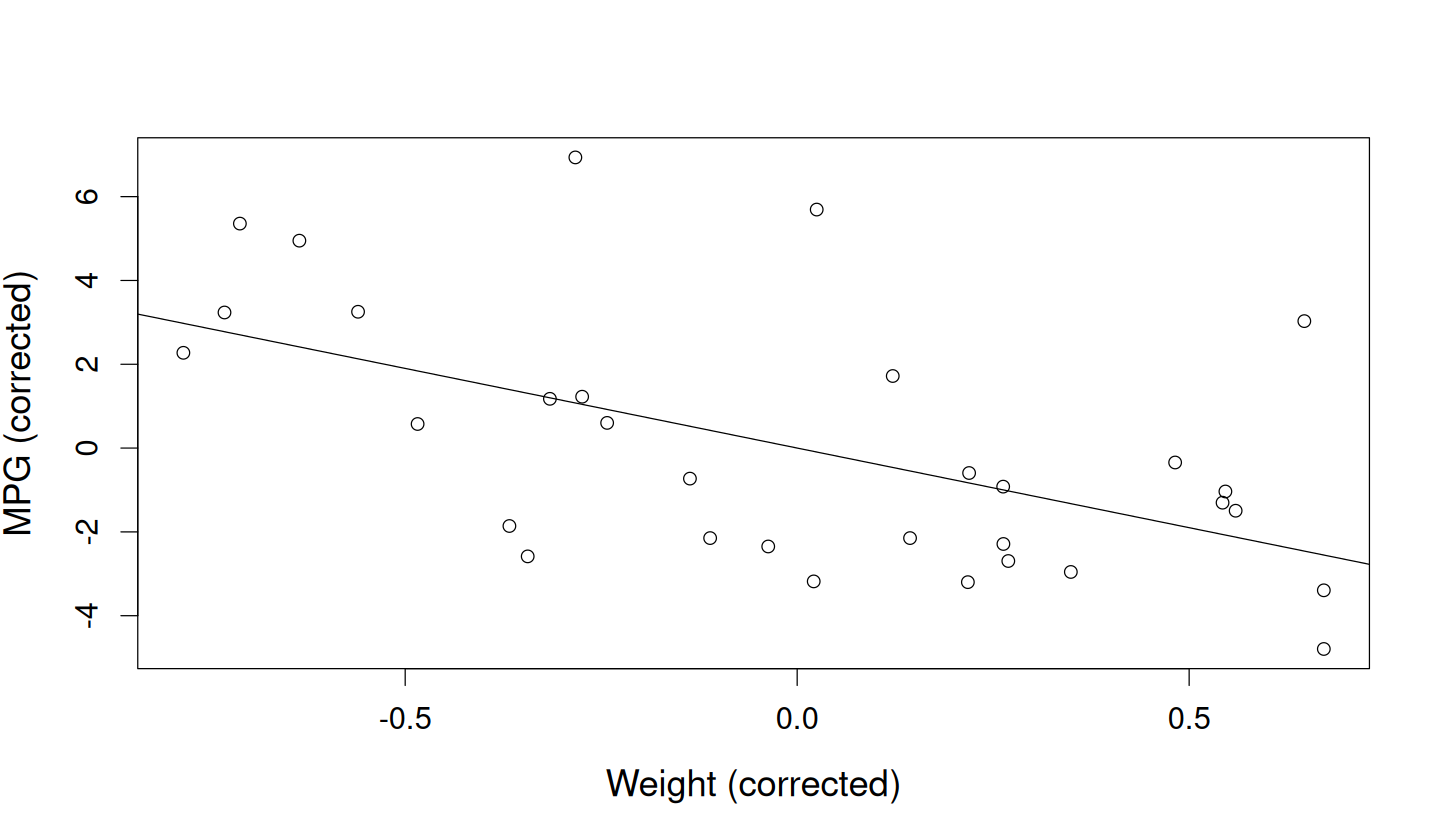

In [17]:
mpg.resid   <- resid(lm(mpg ~ hp + disp, data=mtcars))
wt.resid    <- resid(lm( wt ~ hp + disp, data=mtcars))
add.var.mod <- lm(mpg.resid ~ wt.resid -1) 

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=wt.resid, y=mpg.resid, xlab="Weight (corrected)", ylab="MPG (corrected)")
abline(reg=add.var.mod)

However, it is a bit of a pain to do this manually each time. As such, an easier way is to use the `avPlots()` function from the `car` package to create these plots, like so

In [32]:
options(repr.plot.width=12, repr.plot.height=9)

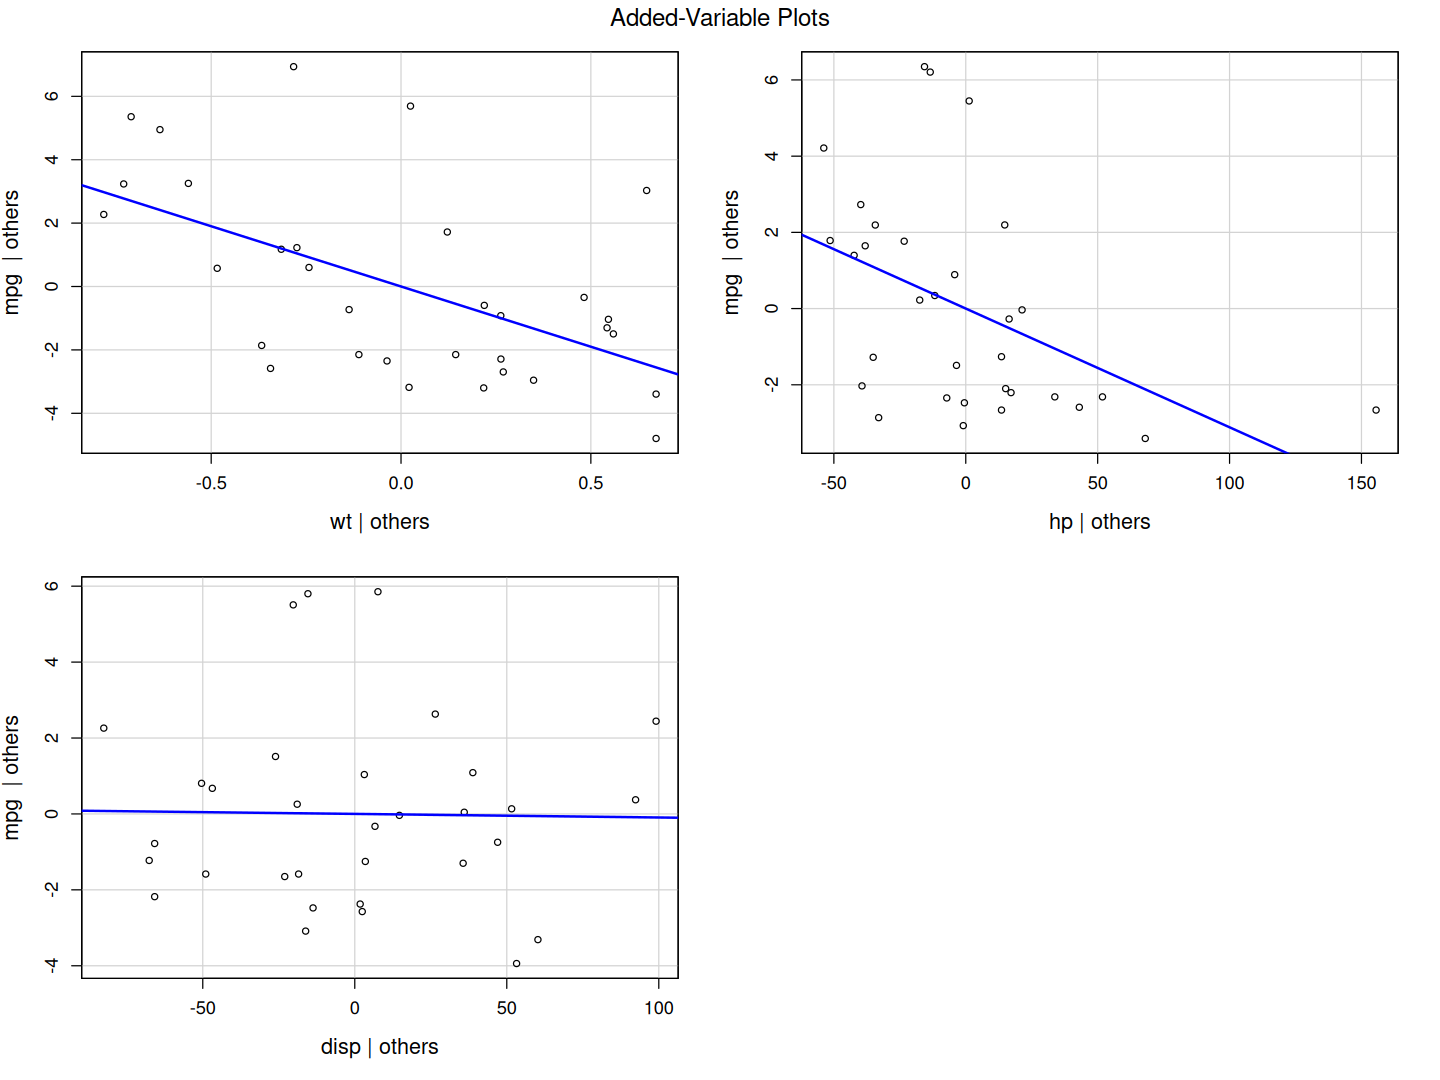

In [34]:
library(car)
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
avPlots(mod, id=FALSE)

From this we can already see that there appear to be strong relationships between MPG and both Weight and Horsepower. However, there appears to be basically no relationship between Engine Displacement and MPG. Notice that this is a very different picture to what we get if we just consider Engine Displacement on its own.

In [36]:
options(repr.plot.width=12, repr.plot.height=7)

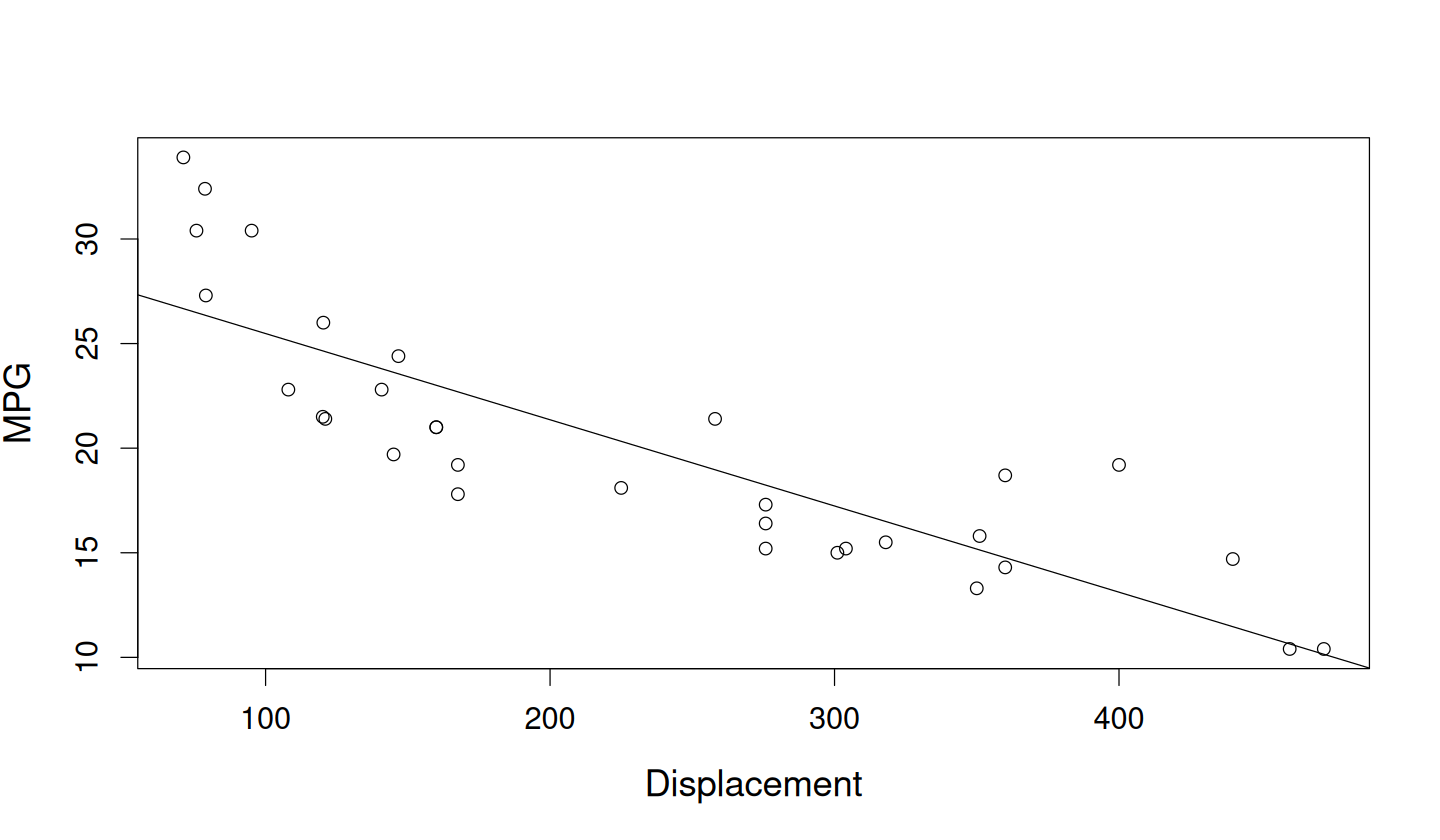

In [37]:
disp.mod <- lm(mpg ~ disp, data=mtcars)
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=mtcars$disp, y=mtcars$mpg, xlab="Displacement", ylab="MPG")
abline(reg=disp.mod)

We will explore the reasons for this in more detail next week. For the moment, just consider how misleading it would be to fit the multiple regression model and then plot the effects based on uncorrected simple regression models.

[^commafoot]: Using commas within the indices is often good practice to remove ambiguity, but does make the notation messy. We will only use these when needed. For instance, $x_{32}$ could be misunderstood as the 32nd index of $x$, rather than $i=3$ and $j=2$. In this case, writing $x_{3,2}$ is needed.

[^cornerfoot]: Note that there are not really any corners to the plane, as it extends infinitely in all directions.

[^linalgfoot]: All software implementing linear models does so using a linear algebraic perspective that expresses the model using matrices. This simplifies both the structure of the model and the estimation of the parameters, but is beyond our current scope.